In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
data=pd.read_csv('glass.csv')
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
#Standardize the data
from sklearn.preprocessing import StandardScaler

In [4]:
std_scaling= StandardScaler()
std_scaling.fit(data.drop('Type',axis=1))

StandardScaler()

In [5]:
std_scaled=std_scaling.transform(data.drop('Type',axis=1))

# making DataFrame
scaled_data = pd.DataFrame(std_scaled,columns=data.columns[:-1])
# scaled_data

In [6]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_data,data['Type'],test_size=0.2)

In [7]:
#knn algo.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
pred= knn.predict(x_test)

In [8]:
np.mean(pred==y_test)

0.7906976744186046

In [9]:
#prediction and evaluation
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test,pred)

array([[16,  0,  0,  0,  0,  0],
       [ 5,  8,  1,  1,  0,  0],
       [ 1,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  7]], dtype=int64)

In [10]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           1       1.00      0.73      0.84        22
           2       0.53      0.89      0.67         9
           3       0.50      0.50      0.50         2
           5       1.00      0.50      0.67         2
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         7

    accuracy                           0.79        43
   macro avg       0.76      0.77      0.72        43
weighted avg       0.87      0.79      0.80        43



In [11]:
error_rate=[]
for i in range(1,40):
    knn_model=KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train,y_train)
    pred_i=knn_model.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test).round(2))
print(error_rate)

[0.21, 0.21, 0.26, 0.26, 0.28, 0.26, 0.3, 0.3, 0.3, 0.3, 0.28, 0.26, 0.26, 0.26, 0.26, 0.28, 0.28, 0.3, 0.28, 0.3, 0.28, 0.35, 0.26, 0.23, 0.26, 0.3, 0.28, 0.35, 0.35, 0.33, 0.35, 0.35, 0.35, 0.35, 0.35, 0.37, 0.35, 0.42, 0.42]


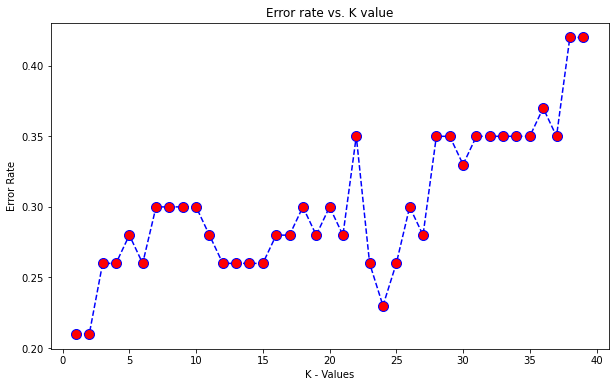

In [12]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('K - Values')
plt.ylabel('Error Rate')
plt.title('Error rate vs. K value')
plt.show()

In [13]:
# use k=2:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
pred= knn.predict(x_test)
print('accuracy =',np.mean(pred==y_test))

print(confusion_matrix(y_test,pred))

print(classification_report(pred,y_test))

accuracy = 0.7906976744186046
[[16  0  0  0  0  0]
 [ 6  9  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  1  0  0  1  0]
 [ 0  0  0  0  0  7]]
              precision    recall  f1-score   support

           1       1.00      0.67      0.80        24
           2       0.60      0.90      0.72        10
           3       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         1
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         7

    accuracy                           0.79        43
   macro avg       0.68      0.76      0.70        43
weighted avg       0.90      0.79      0.82        43



In [14]:
# when k=2, accuracy is 79%